<h1>this assigment is comprised of the parts named as first,second and third assigments.</h1>

<h1>First part of assignment</h1>

In [2]:
import pandas as pd
import numpy as np
import types
import pandas as pd
import requests
from bs4 import BeautifulSoup
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_f50bbb71b92d4d9c8e4292ff7e2d6cc2 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='l78LODgCJNrkRURB0PjL4iIiLyumg6Q0JjgbUZK8bVTp',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_f50bbb71b92d4d9c8e4292ff7e2d6cc2.get_object(Bucket='webscrapingproject-donotdelete-pr-5dijb8earp6i9x',Key='Geospatial_Coordinates.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()


,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


<strong>BeautifulSoup library is used for getting table data in html and I removed the "Not assigned" in Borough columns if exists</strong>

In [3]:
url="https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html.parser')
table = soup.find_all('table')
df = pd.read_html(str(table))[0]

df = df[df.Borough != 'Not assigned']

In [11]:
df.style

,Postal Code,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
8,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
9,M1B,Scarborough,"Malvern, Rouge"
11,M3B,North York,Don Mills
12,M4B,East York,"Parkview Hill, Woodbine Gardens"
13,M5B,Downtown Toronto,"Garden District, Ryerson"


In [12]:
print(df.shape)

(103, 3)


<h1>Second part of assignment</h1>

<strong>the csv files is used for the data of latitude and longitude</strong>

In [4]:
dfGeo=df_data_1.copy()
dfGeo.style

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
5,M1J,43.744734,-79.239476
6,M1K,43.727929,-79.262029
7,M1L,43.711112,-79.284577
8,M1M,43.716316,-79.239476
9,M1N,43.692657,-79.264848


<strong>the values of longitude and latitude are merged with the table neighbourhood</strong>

In [5]:
#listOfGeo=dfGeo["Postal Code"].to_list()
df["Latitude"]=0
df["Longitude"]=0
for item in dfGeo["Postal Code"]:
    data=dfGeo[dfGeo["Postal Code"]==item]
    df.loc[df['Postal Code'] == item,['Latitude']]=data["Latitude"].values[0]
    df.loc[df['Postal Code'] == item,['Longitude']]=data["Longitude"].values[0]
    

  

In [6]:
df.style

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
2,M3A,North York,Parkwoods,43.753259,-79.329656
3,M4A,North York,Victoria Village,43.725882,-79.315572
4,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
5,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
8,M9A,Etobicoke,"Islington Avenue, Humber Valley Village",43.667856,-79.532242
9,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
11,M3B,North York,Don Mills,43.745906,-79.352188
12,M4B,East York,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937
13,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937


<h1>Part 3 of the assignment</h1>

In [7]:
!pip3 install folium

     |████████████████████████████████| 93 kB 2.1 MB/s  eta 0:00:01


In [41]:
from sklearn.cluster import KMeans 
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import folium
%matplotlib inline 


In [9]:
from geopy.geocoders import Nominatim

<strong>I obtain the latitude and longitude values via geocode</strong>

In [10]:
address = 'Toronto, Canada'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


In [11]:

map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(df['Latitude'], df['Longitude'], df['Borough'], df['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

<strong>the Borough values which cotain "Toronto" are used</strong>

In [12]:
torontoDataframe=df[df["Borough"].str.contains("Toronto")].reset_index(drop=True)
torontoDataframe.head()

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
4,M4E,East Toronto,The Beaches,43.676357,-79.293031


<strong>the info for using foursquare API</strong>

In [13]:
CLIENT_ID = '1ZRVG3SNGE24M51YROR4BAZQCNDBGHBOLSMLV4MJ2SRNTJMO' # your Foursquare ID
CLIENT_SECRET = 'P1I5450KIXFMQRLP1V0YJDBF3QXPFWXVI3RO12E3ZW2DYZME' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
radius=50
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 1ZRVG3SNGE24M51YROR4BAZQCNDBGHBOLSMLV4MJ2SRNTJMO
CLIENT_SECRET:P1I5450KIXFMQRLP1V0YJDBF3QXPFWXVI3RO12E3ZW2DYZME


In [14]:
torontoDataframe.loc[0, 'Neighbourhood']

'Regent Park, Harbourfront'

<strong>the function for getting cayegory type of venue</strong>

In [15]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

<strong>the function for getting the values of the nearby venues</strong>

In [16]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [17]:
toronto_venues = getNearbyVenues(names=torontoDataframe['Neighbourhood'],
                                   latitudes=torontoDataframe['Latitude'],
                                   longitudes=torontoDataframe['Longitude']
                                  )

Regent Park, Harbourfront
Queen's Park, Ontario Provincial Government
Garden District, Ryerson
St. James Town
The Beaches
Berczy Park
Central Bay Street
Christie
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
The Danforth West, Riverdale
Toronto Dominion Centre, Design Exchange
Brockton, Parkdale Village, Exhibition Place
India Bazaar, The Beaches West
Commerce Court, Victoria Hotel
Studio District
Lawrence Park
Roselawn
Davisville North
Forest Hill North & West, Forest Hill Road Park
High Park, The Junction South
North Toronto West, Lawrence Park
The Annex, North Midtown, Yorkville
Parkdale, Roncesvalles
Davisville
University of Toronto, Harbord
Runnymede, Swansea
Moore Park, Summerhill East
Kensington Market, Chinatown, Grange Park
Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport
R

In [150]:
print(toronto_venues.shape)
toronto_venues.head()

(1618, 7)


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Regent Park, Harbourfront",43.65426,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
1,"Regent Park, Harbourfront",43.65426,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
2,"Regent Park, Harbourfront",43.65426,-79.360636,Cooper Koo Family YMCA,43.653249,-79.358008,Distribution Center
3,"Regent Park, Harbourfront",43.65426,-79.360636,Morning Glory Cafe,43.653947,-79.361149,Breakfast Spot
4,"Regent Park, Harbourfront",43.65426,-79.360636,Body Blitz Spa East,43.654735,-79.359874,Spa


<strong> printing out the venues and venue category by grouping the items in neighbourhood</strong>

In [29]:
venueCount=toronto_venues.groupby('Neighbourhood').count()
venueCount[["Venue","Venue Category"]]

,Venue,Venue Category
Neighbourhood,,
Berczy Park,59,59
"Brockton, Parkdale Village, Exhibition Place",22,22
"Business reply mail Processing Centre, South Central Letter Processing Plant Toronto",15,15
"CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport",15,15
Central Bay Street,62,62
Christie,16,16
Church and Wellesley,79,79
"Commerce Court, Victoria Hotel",100,100
Davisville,37,37


In [25]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 235 uniques categories.


<strong>For the classification, the dataframe converted into a table containing the data 1 and 0 to show whether the venue category exist in the neighbourhood</strong>

In [30]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighbourhood'] = toronto_venues['Neighbourhood']

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]
print(toronto_onehot.shape)
toronto_onehot.head()


(1613, 236)


,Neighbourhood,Adult Boutique,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Yoga Studio
0,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [154]:
toronto_onehot.shape

(1618, 236)

In [34]:
toronto_grouped = toronto_onehot.groupby('Neighbourhood').mean().reset_index()
toronto_grouped.head()

,Neighbourhood,Adult Boutique,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Yoga Studio
0,Berczy Park,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.016949,0.0,0.0,0.000000,0.0,0.000000
1,"Brockton, Parkdale Village, Exhibition Place",0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000
2,"Business reply mail Processing Centre, South C...",0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000
3,"CN Tower, King and Spadina, Railway Lands, Har...",0.0,0.066667,0.066667,0.066667,0.133333,0.133333,0.133333,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000
4,Central Bay Street,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.016129,0.0,0.0,0.016129,0.0,0.016129


In [35]:
toronto_grouped.shape

(39, 236)

In [47]:
toronto_grouped.isnull().sum()

Neighbourhood            0
Adult Boutique           0
Airport                  0
Airport Food Court       0
Airport Gate             0
                        ..
Video Game Store         0
Vietnamese Restaurant    0
Wine Bar                 0
Wine Shop                0
Yoga Studio              0
Length: 236, dtype: int64

<strong>we get transposing the data frame and we show the frequency of the venues existing in the neighbourhood</strong>

In [36]:
num_top_venues = 5

for hood in toronto_grouped['Neighbourhood']:
    print("----"+str(hood)+"----")
    temp = toronto_grouped[toronto_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Berczy Park----
                venue  freq
0         Coffee Shop  0.10
1        Cocktail Bar  0.05
2            Beer Bar  0.03
3  Seafood Restaurant  0.03
4          Restaurant  0.03


----Brockton, Parkdale Village, Exhibition Place----
            venue  freq
0            Café  0.14
1     Coffee Shop  0.09
2  Breakfast Spot  0.09
3       Pet Store  0.05
4      Restaurant  0.05


----Business reply mail Processing Centre, South Central Letter Processing Plant Toronto----
                venue  freq
0  Light Rail Station  0.13
1                Park  0.07
2       Auto Workshop  0.07
3             Brewery  0.07
4          Skate Park  0.07


----CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport----
              venue  freq
0    Airport Lounge  0.13
1   Airport Service  0.13
2  Airport Terminal  0.13
3   Harbor / Marina  0.07
4           Airport  0.07


----Central Bay Street----
                venue  freq
0         Coffee Sho

In [37]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [58]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighbourhood'] = toronto_grouped['Neighbourhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berczy Park,Coffee Shop,Cocktail Bar,Beer Bar,Farmers Market,Bakery,Seafood Restaurant,Cheese Shop,Restaurant,Indian Restaurant,Pub
1,"Brockton, Parkdale Village, Exhibition Place",Café,Coffee Shop,Breakfast Spot,Nightclub,Bar,Intersection,Bakery,Restaurant,Climbing Gym,Furniture / Home Store
2,"Business reply mail Processing Centre, South C...",Light Rail Station,Farmers Market,Burrito Place,Skate Park,Auto Workshop,Brewery,Garden Center,Restaurant,Fast Food Restaurant,Pizza Place
3,"CN Tower, King and Spadina, Railway Lands, Har...",Airport Lounge,Airport Service,Airport Terminal,Harbor / Marina,Bar,Coffee Shop,Rental Car Location,Sculpture Garden,Boat or Ferry,Airport Gate
4,Central Bay Street,Coffee Shop,Sandwich Place,Café,Italian Restaurant,Burger Joint,Bubble Tea Shop,Thai Restaurant,Salad Place,Ramen Restaurant,Portuguese Restaurant


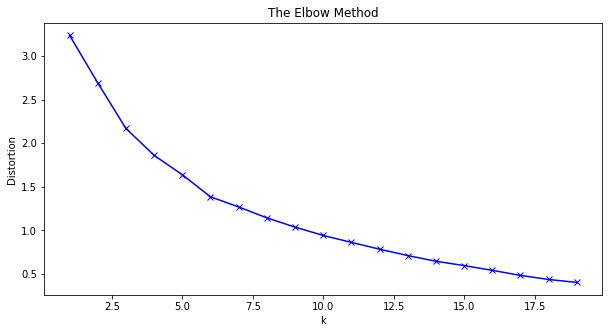

In [49]:
distortions = []
toronto_grouped_clustering_for_bestK = toronto_grouped.drop('Neighbourhood', 1)
K = range(1,20)
for k in K:
    kmean = KMeans(n_clusters=k, random_state=0, n_init = 50, max_iter = 1000)
    kmean.fit(toronto_grouped_clustering_for_bestK)
    distortions.append(kmean.inertia_)


plt.figure(figsize=(10,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method')
plt.show()


In [51]:
!pip3 install yellowbrick

     |████████████████████████████████| 269 kB 16.0 MB/s eta 0:00:01


<strong> I used a KElbowVisualizer function to find the best K value for kmeans clustering
The function link as :https://www.scikit-yb.org/en/latest/api/cluster/elbow.html
</strong>

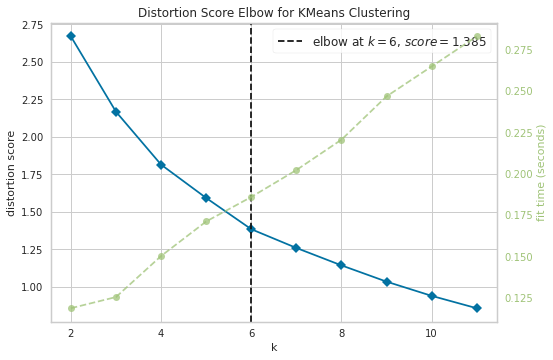

In [54]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

# Generate synthetic dataset with 8 random clusters
#X, y = make_blobs(n_samples=1000, n_features=12, centers=8, random_state=42)

# Instantiate the clustering model and visualizer
kmean = KMeans(n_clusters=k, random_state=42, n_init = 50, max_iter = 1000)
#kmean.fit(toronto_grouped_clustering_for_bestK)


visualizer = KElbowVisualizer(kmean, k=(2,12))

visualizer.fit(toronto_grouped_clustering_for_bestK)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure


In [59]:
# set number of clusters
kclusters = 6

toronto_grouped_clustering = toronto_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 2, 2, 2, 2, 4, 2, 2, 2, 2], dtype=int32)

In [61]:
# add clustering labels
#df.drop(columns=['B', 'C'])
if "Cluster_Labels" in neighborhoods_venues_sorted.columns:
    neighborhoods_venues_sorted.drop(columns=['Cluster_Labels'])


neighborhoods_venues_sorted.insert(0, 'Cluster_Labels', kmeans.labels_)

toronto_merged = torontoDataframe

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
toronto_merged1 = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')

toronto_merged1.head() # check the last columns!

,Postal Code,Borough,Neighbourhood,Latitude,Longitude,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,2,Coffee Shop,Park,Bakery,Café,Pub,Breakfast Spot,Restaurant,Theater,Cosmetics Shop,Shoe Store
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,2,Coffee Shop,Sushi Restaurant,College Auditorium,Bar,Beer Bar,Smoothie Shop,Sandwich Place,Burrito Place,Café,Portuguese Restaurant
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,2,Coffee Shop,Clothing Store,Café,Japanese Restaurant,Hotel,Middle Eastern Restaurant,Bubble Tea Shop,Cosmetics Shop,Ramen Restaurant,Bookstore
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,2,Coffee Shop,Café,Cosmetics Shop,American Restaurant,Cocktail Bar,Hotel,Gym,Cheese Shop,Gastropub,Italian Restaurant
4,M4E,East Toronto,The Beaches,43.676357,-79.293031,0,Health Food Store,Pub,Trail,Neighborhood,Yoga Studio,Doner Restaurant,Discount Store,Distribution Center,Dog Run,Eastern European Restaurant


In [62]:
toronto_merged1["Cluster_Labels"].value_counts()

2    32
3     2
0     2
5     1
4     1
1     1
Name: Cluster_Labels, dtype: int64

<strong>the k value 6 even seems the best, we cannot see the effective clustering as shown in the map below</strong>

In [63]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged1['Latitude'], toronto_merged1['Longitude'], toronto_merged1['Neighbourhood'], toronto_merged1['Cluster_Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters